In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd 
from arch import arch_model
from scipy import stats
import scipy

C:\Users\33695\AppData\Local\Temp\ipykernel_21968\1428727779.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russel_2017_2019['Date'] = pd.to_datetime(russel_2017_2019['Date'])
C:\Users\33695\AppData\Local\Temp\ipykernel_21968\1428727779.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russel_2020_2022['Date'] = pd.to_datetime(russel_2020_2022['Date'])


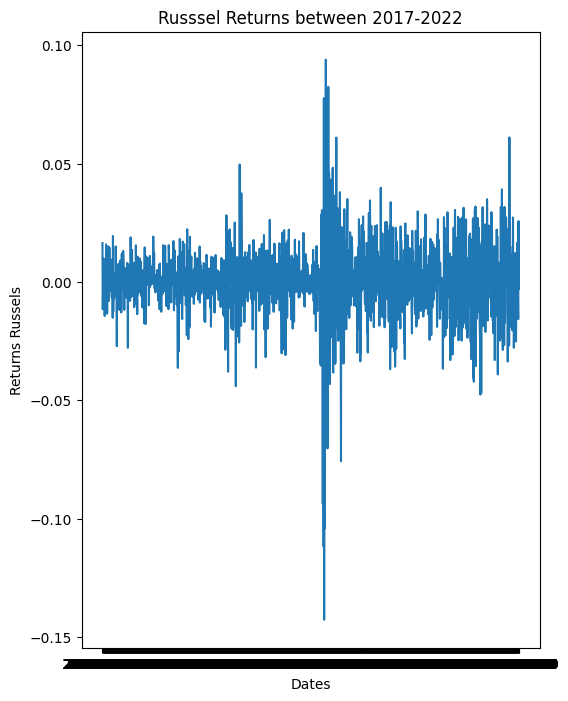

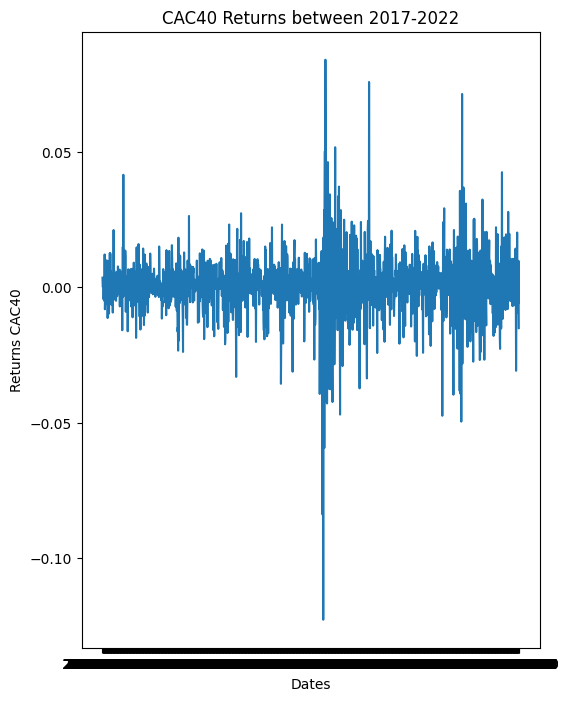

In [70]:
russel = pd.read_csv("RUSSEL2000.csv")
returns_russel = np.array(russel['Close'])[1:]/np.array(russel['Close'])[:-1] - 1
returns_russel = returns_russel[~np.isnan(returns_russel)]
figure = plt.figure(figsize=(13,8))
ax = plt.subplot(1,2, 1)
plt.plot(russel['Date'][1:], returns_russel)
ax.set_xlabel('Dates')
ax.set_ylabel('Returns Russels')
ax.set_title('Russsel Returns between 2017-2022')
ax.grid(True)
plt.grid()

#filtered_russel = np.where((returns_russel < -0.05) | (returns_russel > 0.05))[0]
#filtered_date = russel.loc[filtered_russel, 'Date']
#russel = russel.drop(filtered_russel)
#returns_russel = np.delete(returns_russel,filtered_russel)
#print (filtered_date)
#ax = plt.subplot(1,2, 2)
#plt.plot(russel['Date'][1:], returns_russel)
#ax.set_xlabel('Dates')
#ax.set_ylabel('Returns Modified Russels 2000')
#ax.set_title('Modified Russsel Returns between 2017-2022')
#ax.grid(True)
#plt.grid()

russel_2017_2019 = russel[(russel['Date'] >= '2017-01-01') & (russel['Date'] <= '2019-12-31')]
russel_2020_2022 = russel[(russel['Date'] >= '2020-01-01') & (russel['Date'] <= '2022-12-31')]

# Exporter les données filtrées vers de nouveaux fichiers CSV
russel_2017_2019.to_csv('russel_2017_2019.csv', index=False)
russel_2020_2022.to_csv('russel_2020_2022.csv', index=False)
russel_2017_2019['Date'] = pd.to_datetime(russel_2017_2019['Date'])
russel_2020_2022['Date'] = pd.to_datetime(russel_2020_2022['Date'])

cac = pd.read_csv("CAC40.csv")
returns_cac = np.array(cac['Close'])[1:]/np.array(cac['Close'])[:-1] - 1
returns_cac = returns_cac[~np.isnan(returns_cac)]
figure = plt.figure(figsize=(13,8))
ax = plt.subplot(1,2, 1)
plt.plot(cac['Date'][1:], returns_cac)
ax.set_xlabel('Dates')
ax.set_ylabel('Returns CAC40')
ax.set_title('CAC40 Returns between 2017-2022')
ax.grid(True)
plt.grid()

#filtered_cac = np.where((returns_cac < -0.05) | (returns_cac > 0.05))[0]
#filtered_date_cac = cac.loc[filtered_cac, 'Date']
#cac = cac.drop(filtered_cac)
#returns_cac = np.delete(returns_cac,filtered_cac)
#print (filtered_date_cac)
#ax = plt.subplot(1,2, 2)
#plt.plot(cac['Date'][1:], returns_cac)
#ax.set_xlabel('Dates')
#ax.set_ylabel('Returns CAC40')
#ax.set_title('Modified CAC40 Returns between 2017-2022')
#ax.grid(True)
#plt.grid()

cac_2017_2019 = cac[(cac['Date'] >= '2017-01-01') & (cac['Date'] <= '2019-12-31')]
cac_2020_2022 = cac[(cac['Date'] >= '2020-01-01') & (cac['Date'] <= '2022-12-31')]

# Exporter les données filtrées vers de nouveaux fichiers CSV
cac_2017_2019.to_csv('cac_2017_2019.csv', index=False)
cac_2020_2022.to_csv('cac_2020_2022.csv', index=False)

# Modèle GARCH
#model_garch_russ2017 = arch_model(russel_2017_2019['Returns'].dropna(), vol='Garch', p=1, q=1)
#model_garch_russ2020 = arch_model(russel_2020_2022['Returns'].dropna(), vol='Garch', p=1, q=1)
#model_garch_cac2017 = arch_model(cac_2017_2019['Returns'].dropna(), vol='Garch', p=1, q=1)
#model_garch_cac2020 = arch_model(cac_2020_2022['Returns'].dropna(), vol='Garch', p=1, q=1)

#result = model_garch_russ2017.fit()
#print(result.summary())



GARCH model parameters for cac40 2017-2019

mu 0.000696
omega 9e-06
alpha 0.1732
beta 0.695
long-run volatility 0.0082
log-likelihood 2638.1566

GARCH model parameters for cac40 2020-2022

mu 0.000996
omega 1.5e-05
alpha 0.2049
beta 0.7292
long-run volatility 0.0151
log-likelihood 2270.7315


C:\Users\33695\AppData\Local\Temp\ipykernel_21968\3531392970.py:73: RuntimeWarning: invalid value encountered in scalar power
  conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
C:\Users\33695\AppData\Local\Temp\ipykernel_21968\3531392970.py:66: RuntimeWarning: invalid value encountered in scalar power
  long_run = (omega/(1 - alpha - beta))**(1/2)



GARCH model parameters for russel 2017-2019

mu 0.000642
omega 4e-06
alpha 0.0979
beta 0.8598
long-run volatility 0.0099
log-likelihood 2459.1313

GARCH model parameters for russel 2020-2022

mu 0.000529
omega 1.9e-05
alpha 0.1501
beta 0.7891
long-run volatility 0.0176
log-likelihood 2008.634
[ 3.46569506e-03  1.42516428e-05  2.53108151e-04  1.87548616e-03
 -4.54611149e-03  1.35059231e-04  9.81863453e-05 -5.07343594e-03
  1.19595265e-02 -8.22267010e-03 -4.61723975e-03 -1.29516765e-03
 -2.52921159e-03  1.96656517e-03 -6.05037490e-03  1.78618555e-03
  9.81499653e-03 -2.14054143e-03 -5.61650505e-03 -1.14997688e-02
 -7.49782395e-03  9.57313788e-03 -6.04949273e-05  6.47212687e-03
 -9.85895298e-03 -4.95353511e-03  2.54800966e-03  1.24344620e-02
  4.30799543e-04  1.23235351e-02  1.55966413e-03  5.91407613e-03
 -5.17083300e-03 -6.52807731e-03 -5.32201459e-04  4.87393650e-03
  1.45536647e-03 -9.37930857e-04 -9.45925234e-03 -1.23953342e-05
  2.76179752e-03  2.08268510e-02  5.98455988e-04  6.291

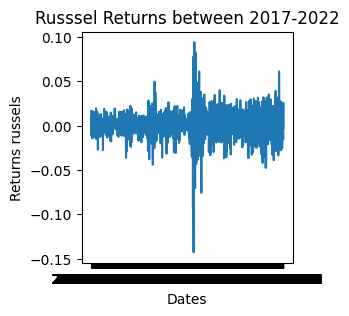

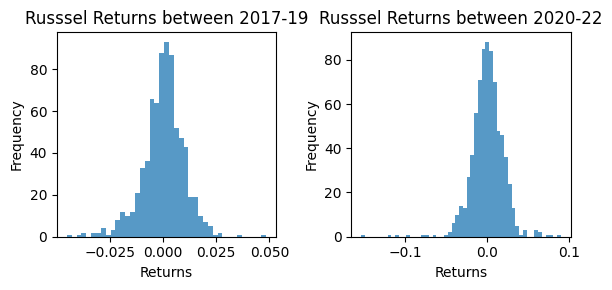

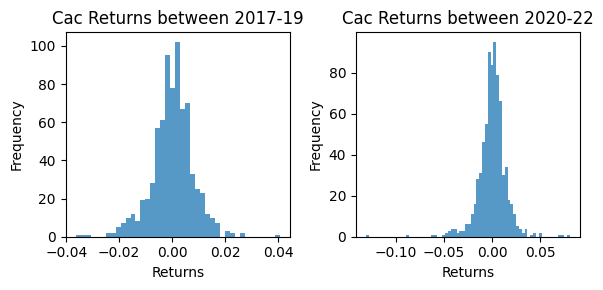

In [71]:
#Création des 4 returns
returns_cac_2017_2019 = np.array(cac_2017_2019['Close'])[1:]/np.array(cac_2017_2019['Close'])[:-1] - 1
returns_cac_2017_2019 = np.log1p(returns_cac_2017_2019[~np.isnan(returns_cac_2017_2019)])
returns_cac_2020_2022 = np.array(cac_2020_2022['Close'])[1:]/np.array(cac_2020_2022['Close'])[:-1] - 1
returns_cac_2020_2022 = np.log1p(returns_cac_2020_2022[~np.isnan(returns_cac_2020_2022)])
returns_russel_2017_2019 = np.array(russel_2017_2019['Close'])[1:]/np.array(russel_2017_2019['Close'])[:-1] - 1
returns_russel_2017_2019 = np.log1p(returns_russel_2017_2019[~np.isnan(returns_russel_2017_2019)])
returns_russel_2020_2022 = np.array(russel_2020_2022['Close'])[1:]/np.array(russel_2020_2022['Close'])[:-1] - 1
returns_russel_2020_2022 = np.log1p(returns_russel_2020_2022[~np.isnan(returns_russel_2020_2022)])

figure = plt.figure(figsize=(6,3))
ax = plt.subplot(1,2, 1)
plt.plot(russel['Date'][1:], returns_russel)
ax.set_xlabel('Dates')
ax.set_ylabel('Returns russels')
ax.set_title('Russsel Returns between 2017-2022')
ax.grid(True)
plt.grid()

figure = plt.figure(figsize=(6,3))
ax = plt.subplot(1,2, 1)
ax.hist(returns_russel_2017_2019, bins='auto', alpha=0.75)
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')
ax.set_title('Russsel Returns between 2017-19')
ax.grid(True)
plt.grid()

ax = plt.subplot(1,2, 2)
ax.hist(returns_russel_2020_2022, bins='auto', alpha=0.75)
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')
ax.set_title('Russsel Returns between 2020-22')
ax.grid(True)
plt.grid()
plt.tight_layout()

figure = plt.figure(figsize=(6,3))
ax = plt.subplot(1,2, 1)
ax.hist(returns_cac_2017_2019, bins='auto', alpha=0.75)
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')
ax.set_title('Cac Returns between 2017-19')
ax.grid(True)
plt.grid()

ax = plt.subplot(1,2, 2)
ax.hist(returns_cac_2020_2022, bins='auto', alpha=0.75)
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')
ax.set_title('Cac Returns between 2020-22')
ax.grid(True)
plt.grid()
plt.tight_layout()

#nom des 4 répartitions
cac_17_19 = 'cac_2017_2019'
cac_20_22 = 'cac_2020_2022'
rus_17_19 = 'rus_2017_2019'
rus_20_22 = 'rus_2020_2022'

def garch_mle(params,returns):
    #specifying model parameters
    mu, omega, alpha, beta = params
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = returns - mu
    realised = abs(resid)
    conditional = np.zeros(len(returns))
    conditional[0] =  long_run
    for t in range(1,len(returns)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood

def optimize(returns, returns_section):
    mean = np.average(returns_cac_2017_2019)
    var = np.std(returns_cac_2017_2019)**2
    res = scipy.optimize.minimize(garch_mle, [mean, var, 0, 0],returns, method='Nelder-Mead')
    #retrieving optimal parameters
    params = res.x
    mu = res.x[0]
    omega = res.x[1]
    alpha = res.x[2]
    beta = res.x[3]
    log_likelihood = -float(res.fun)
    #calculating realised and conditional volatility for optimal parameters
    long_run = (omega/(1 - alpha - beta))**(1/2)
    resid = returns - mu
    realised = abs(resid)
    conditional = np.zeros(len(returns))
    conditional[0] =  long_run
    for t in range(1,len(returns)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #printing optimal parameters
    if(returns_section== cac_17_19):
        print("\n"+ f'GARCH model parameters for cac40 2017-2019')
        print('')
    elif(returns_section== cac_20_22):
        print("\n"+ f'GARCH model parameters for cac40 2020-2022')
        print('')
    elif(returns_section== rus_17_19):
        print("\n"+ f'GARCH model parameters for russel 2017-2019')
        print('')
    elif(returns_section== rus_20_22):
        print("\n" + f'GARCH model parameters for russel 2020-2022')
        print('')
    print('mu '+str(round(mu, 6)))
    print('omega '+str(round(omega, 6)))
    print('alpha '+str(round(alpha, 4)))
    print('beta '+str(round(beta, 4)))
    print('long-run volatility '+str(round(long_run, 4)))
    print('log-likelihood '+str(round(log_likelihood, 4)))

optimize(returns_cac_2017_2019, cac_17_19)
optimize(returns_cac_2020_2022, cac_20_22)
optimize(returns_russel_2017_2019,rus_17_19)
optimize(returns_russel_2020_2022,rus_20_22)
print(returns_cac_2017_2019)


#### returns stationary processes

In [78]:
def mean(returns): 
    return np.average(returns)

def var(returns):
    return np.var(returns)

def cov(return1, return2):
    n= min(len(return1),len(return2))
    mean1=mean(return1)
    mean2=mean(return2)
    val = 0
    for i in range(n):
        val+=(return1[i]-mean1)*(return2[i]-mean2)
    return (1/(n-1))*val

def test(return1, return2):
    n=min(len(return1),len(return2))
    var_var_x = 0
    for i in range(n):
        var_var_x += ((return1[i]-mean(return1))**2-var(return1))**2
    var_var_y = (1/n)*var_var_x
    for i in range(n):
        var_var_y += ((return2[i]-mean(return2))**2-var(return2))**2
    var_var_y = (1/n)*var_var_y
    cov_var_xy = 0
    for i in range(n):
        cov_var_xy += ((return2[i]-mean(return2))**2-var(return2))*((return1[i]-mean(return1))**2-var(return1))
    cov_var_xy=cov_var_xy*1/n
    var_combined = var_var_x + var_var_y - 2*cov_var_xy 
    dif_var = 0
    for i in range(n):
        dif_var += (return1[i]-mean(return1))**2-(return2[i]-mean(return2))**2 
    dif_var = dif_var/n
    t=dif_var/np.sqrt(var_combined/n)
    df = n-1
    p_value = 2*(1 - stats.t.cdf(abs(t), df))
    print("t =",t)
    print("df =", df)
    print("p_value = ", p_value)

print("cac40: ")
test(returns_russel_2020_2022,returns_cac_2020_2022)
print("russel2000 : ")
test(returns_russel_2017_2019,returns_cac_2017_2019)
print("cac40 vs russel2000 20-22 : ")
test(returns_cac_2017_2019,returns_cac_2020_2022)
print("russel2000 vs cac 40 17-19 : ")
test(returns_russel_2017_2019,returns_russel_2020_2022)

print(1/1514)

cac40: 
t = 0.13630838738580275
df = 754
p_value =  0.891613878296956
russel2000 : 
t = 0.16121220174649165
df = 752
p_value =  0.8719695710103574
cac40 vs russel2000 20-22 : 
t = -1.2554196834079645
df = 763
p_value =  0.2097107829134066
russel2000 vs cac 40 17-19 : 
t = -1.5347955049769562
df = 752
p_value =  0.12525466571332133
0.0006605019815059445
